<a href="https://colab.research.google.com/github/Lajwanthi/sct_DS_02/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset directly from seaborn for convenience
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Show first few rows
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Check for missing values
titanic.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# Drop unnecessary columns
titanic.drop(columns=['deck', 'embark_town'], inplace=True)

# Fill missing age with median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill 'embarked' with mode
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Drop remaining rows with missing values
titanic.dropna(inplace=True)


In [7]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


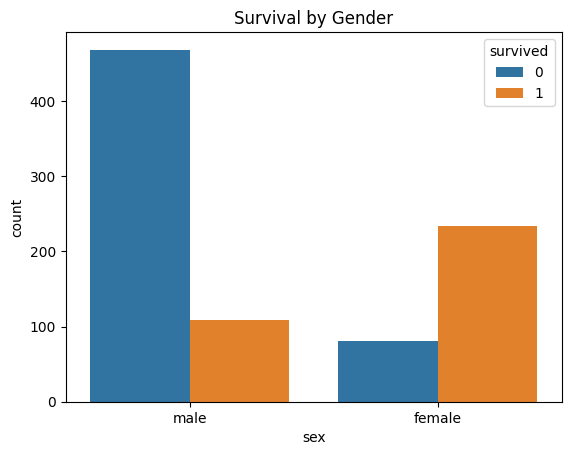

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.show()

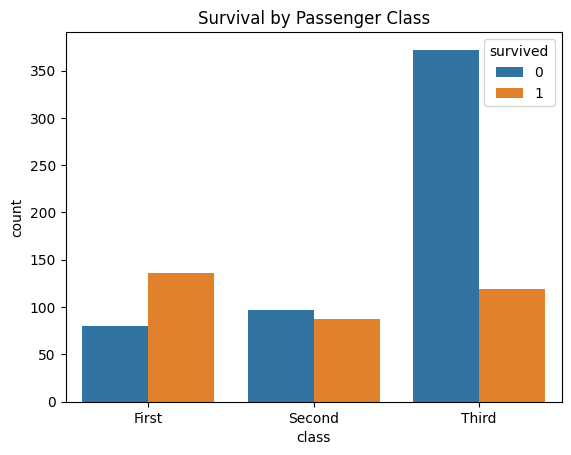

In [9]:
sns.countplot(data=titanic, x='class', hue='survived')
plt.title('Survival by Passenger Class')
plt.show()

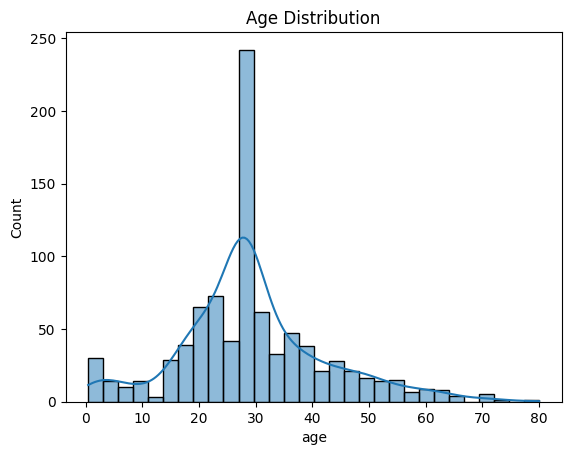

In [10]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

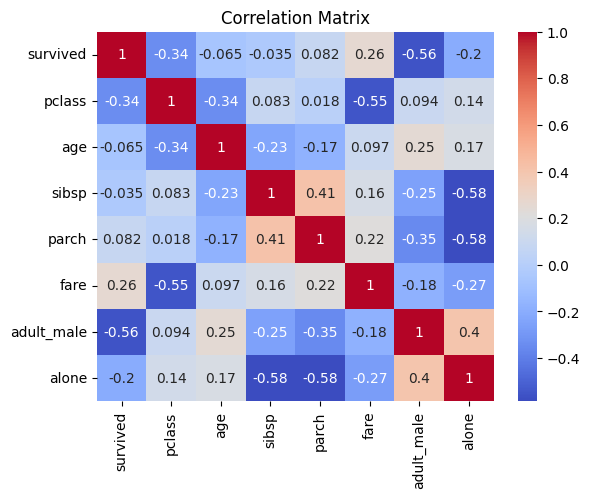

In [11]:
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

| Variable | Trend                                                            |
| -------- | ---------------------------------------------------------------- |
| Gender   | Females had significantly higher survival rates.                 |
| Class    | 1st Class passengers were more likely to survive.                |
| Age      | Children had better survival chances, but not universally.       |
| Fare     | Higher fare correlated with higher survival, often due to class. |
